Sentiment Analysis and Modeling on Amazon Product Review.


Importing Libraries


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
import warnings
warnings.filterwarnings('ignore')

Read the dataset


In [ ]:
df = pd.read_csv(r".\input_data\Reviews.csv")
df

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...,...
568449,568450,B001EO7N10,A28KG5XORO54AY,Lettie D. Carter,0,0,5,1299628800,Will not do without,Great for sesame chicken..this is a good if no...
568450,568451,B003S1WTCU,A3I8AFVPEE8KI5,R. Sawyer,0,0,2,1331251200,disappointed,I'm disappointed with the flavor. The chocolat...
568451,568452,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,1329782400,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o..."
568452,568453,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1,1,5,1331596800,Favorite Training and reward treat,These are the BEST treats for training and rew...


In [4]:
# Making a deep copy of the data so we can re-use it later 
df2 = df.copy()
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


Exploratory Data Analysis

In [5]:
# Know the number of rows and columns of the data
df.shape

(568454, 10)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568428 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary                 568427 non-null  object
 9   Text                    568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


In [7]:
# We have to deal with the customer review's so, we selected the text column
df["Text"]

0         I have bought several of the Vitality canned d...
1         Product arrived labeled as Jumbo Salted Peanut...
2         This is a confection that has been around a fe...
3         If you are looking for the secret ingredient i...
4         Great taffy at a great price.  There was a wid...
                                ...                        
568449    Great for sesame chicken..this is a good if no...
568450    I'm disappointed with the flavor. The chocolat...
568451    These stars are small, so you can give 10-15 o...
568452    These are the BEST treats for training and rew...
568453    I am very satisfied ,product is as advertised,...
Name: Text, Length: 568454, dtype: object

We will remove all the unnecssary columns keep only 2 columns TEXT AND SCORE to perform sentiment analysis 

In [8]:
df.drop(['Id','ProductId','UserId','ProfileName','HelpfulnessNumerator','HelpfulnessDenominator','Time','Summary'],axis =1,inplace=True )

In [9]:
# to ensure that there are only 2 columns left
df.columns

Index(['Score', 'Text'], dtype='object')

In [10]:
# check null values
df.isna().sum()

Score    0
Text     0
dtype: int64

In [11]:
# check duplicates values
df.duplicated().sum()

174779

In [12]:
# remove duplicates values from the dataset
df.drop_duplicates(inplace= True)

In [13]:
df.shape

(393675, 2)

Number of rows after removing duplicates from 568454 to 393675

Exploring Target Column Score

In [14]:
# Show number of unique values in score column
df['Score'].nunique()

5

In [15]:
# show unique values in score column
df['Score'].unique()

array([5, 1, 4, 2, 3], dtype=int64)

Distribution of Ratings in Score Column

In [16]:
# Show value distribution(in percentage) of score ratings 
df['Score'].value_counts()/len(df)*100
 

Score
5    63.693402
4    14.243729
1     9.215724
3     7.562583
2     5.284562
Name: count, dtype: float64

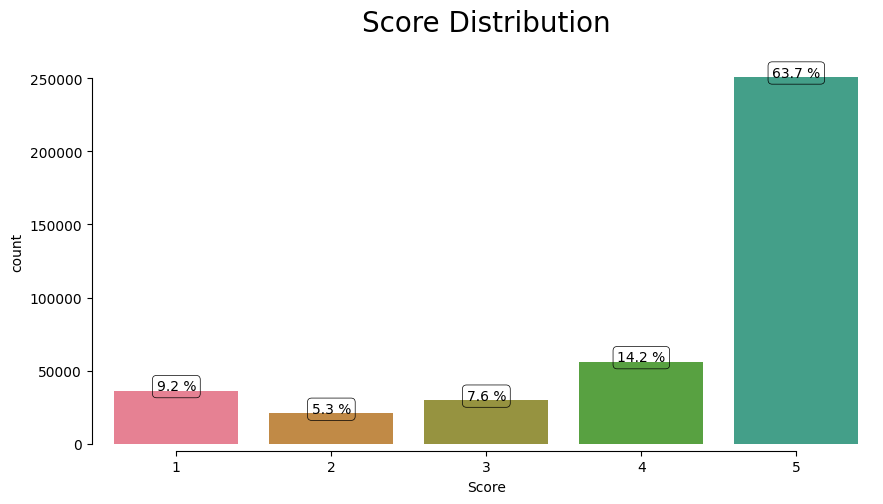

In [17]:
plt.figure(figsize=(10,5))
ax = sns.countplot(x=df['Score'], palette= sns.color_palette("husl", 9))
total = float(len(df))
for p in ax.patches:
    height =p.get_height()
    ax.text(p.get_x() + p.get_width()/2.0,height + 75,'{:1.1f} %'.format((height/total)*100), ha ="center",
            bbox = dict(facecolor ='none', edgecolor = 'black', boxstyle ='round', linewidth =0.5))
ax.set_title('Score Distribution', fontsize =20, y= 1.05)
sns.despine(right = True)
sns.despine(offset= 5, trim =True)


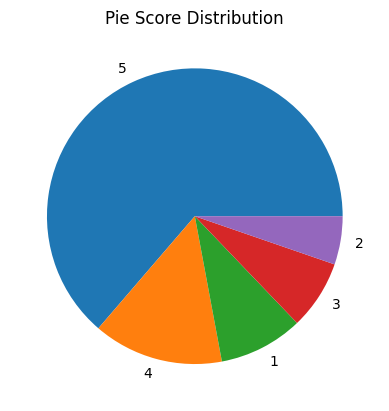

In [18]:
score_values = df['Score'].value_counts()
plt.pie(score_values,labels= score_values.index)
plt.title('Pie Score Distribution')
plt.show()

Observation:
We notice that 63.7 % of reviews have the highest score ratings which indicate that high percentage of product reviews are positive.

The Distribution of score values is not balanced at all. 

Taking Samples from Score Column

In [19]:
new_df = df.groupby('Score').apply(lambda x: x.sample(15000)).reset_index(drop =True)

In [20]:
new_df

,Score,Text
0,1,"For reference, I've had several Kona coffees b..."
1,1,An overwhelming smell and taste of preservativ...
2,1,This product was a big disappointment. The pi...
3,1,I found these for much less ($2.50 + $2.55) at...
4,1,The licorice was stale and many of the wrapper...
...,...,...
74995,5,Bought my first 7 oz bag in December and am ju...
74996,5,My husband and I love dry cereal. We polished ...
74997,5,"13 caffeine coffees, all different roasts: 8 G..."
74998,5,I used to eat boxes and boxes of Hershey's cho...


In [21]:
new_df.shape

(75000, 2)

By taking from each score 15000 samples, we will have 75000 row and by this data became balanced.

To Ensure Score Distribution After Sampling

In [22]:
new_df['Score'].value_counts()

Score
1    15000
2    15000
3    15000
4    15000
5    15000
Name: count, dtype: int64

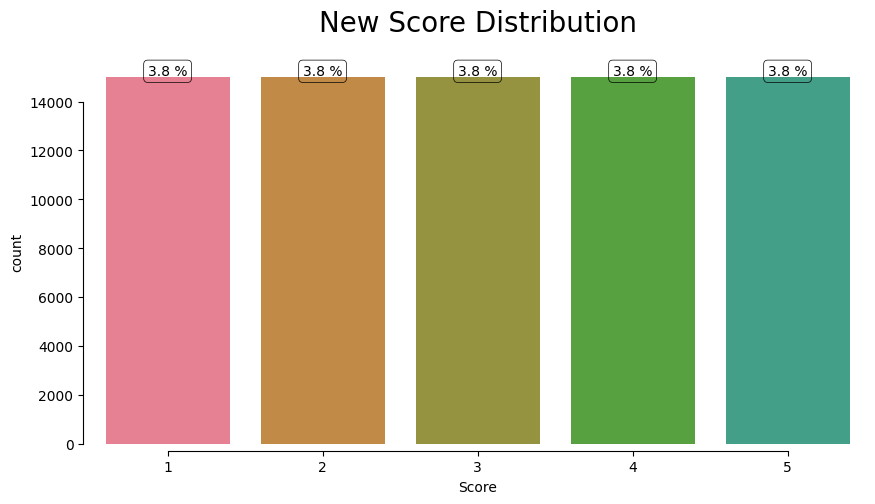

In [23]:
plt.figure(figsize=(10,5))
ax=sns.countplot(x=new_df['Score'], palette= sns.color_palette("husl", 9))
total=float(len(df))
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,height +75,'{:1.1f} %'.format((height/total)*100), ha='center',bbox=dict(facecolor='none',edgecolor='black',boxstyle='round',linewidth=0.5))
ax.set_title('New Score Distribution', fontsize=20, y=1.05)
sns.despine(right=True)
sns.despine(offset=5, trim =True)



As Shown, Score Column is balanced and each value have the same distribution so the model won't be biased to specific value.

Text Preprocessing

In [24]:
# import libraries for preprocessing
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer

In [25]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sangi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [26]:
stop_words =set(stopwords.words('english'))
stemming = PorterStemmer()


In [27]:

# Define your desired NLTK data path
nltk_data_path = 'C:\\nltk_data'

# Add the path to the NLTK data paths
nltk.data.path.append(nltk_data_path)

# Download necessary NLTK data to your custom path
nltk.download('punkt', download_dir=nltk_data_path)
nltk.download('punkt_tab', download_dir=nltk_data_path)
nltk.download('stopwords', download_dir=nltk_data_path)

[nltk_data] Downloading package punkt to C:\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to C:\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to C:\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [28]:
def clean_text(text):
    # 1. Convert in to lower
    txt = text.lower()

    # 2. split in to words
    token = word_tokenize(txt)

    # 3. remove punctuation
    token = [word for word in token if word not in string.punctuation]
    
    # 4. Remove stopwords
    token = [word for word in token if word not in stop_words]
    
    # 5. Remove numbers
    token = [word for word in token if not word.isdigit()]
    
    
    # 6. Apply Stemming
    token = [stemming.stem(word) for word in token]

    
   # To return these single words back into one string
    return ' '.join(token)  




In [29]:
new_df["cleaned_text"] = new_df["Text"].apply(clean_text)

In [30]:
new_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75000 entries, 0 to 74999
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Score         75000 non-null  int64 
 1   Text          75000 non-null  object
 2   cleaned_text  75000 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [31]:
!pip install WordCloud


[notice] A new release of pip is available: 24.1.1 -> 25.0
[notice] To update, run: C:\Users\sangi\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [32]:
from wordcloud import WordCloud


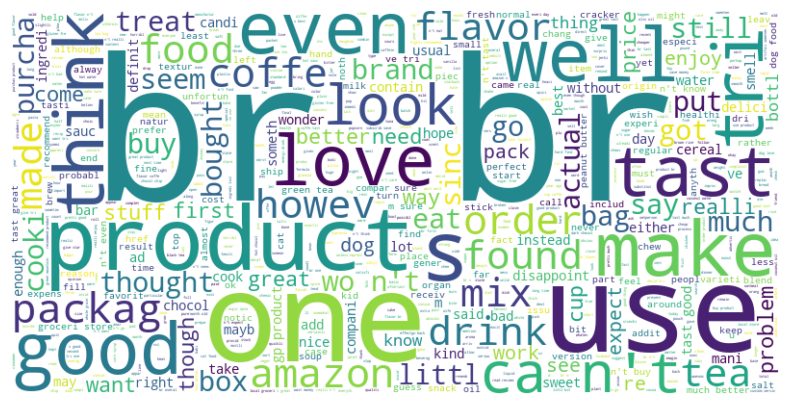

In [33]:

# Combine all cleaned text into a single string
all_text = ' '.join(new_df['cleaned_text'])

# Create the wordcloud object with the top 1000 words
wordcloud =WordCloud(width=800,height= 400,max_words= 1000, background_color='white').generate(all_text)

# plot the wordcloud using matplotlib
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation ='bilinear')
plt.axis('off')
plt.show()


In [34]:
len(set(all_text))

75

In [35]:
len(all_text)

20354892

In [36]:
!pip install gensim


[notice] A new release of pip is available: 24.1.1 -> 25.0
[notice] To update, run: C:\Users\sangi\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Vectorizing Text to numbers before Modeling

In [37]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report


In [38]:
!pip install scikit-learn


[notice] A new release of pip is available: 24.1.1 -> 25.0
[notice] To update, run: C:\Users\sangi\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Spliting Data

In [39]:
new_df['Score'] = new_df['Score'].apply(lambda x: 1 if x>=3 else 0)

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
x = new_df['cleaned_text']
y = new_df['Score']

In [42]:
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state= 42, test_size=0.2)

1. LOGISTIC REGRESSION

In [43]:
logistic_pipe = Pipeline(
    [
        ('vec',CountVectorizer(stop_words= 'english')),
         ('Tf_idf',TfidfTransformer()),
          ('log_rg',LogisticRegression()),
    ]
)


In [44]:
log_fit = logistic_pipe.fit(x_train,y_train)

In [56]:
# Store the fitted model in a pickle file

import joblib

joblib.dump(log_fit, r'.\models\logistic_regression_model.pkl')

['.\\models\\logistic_regression_model.pkl']

In [45]:
log_pred = logistic_pipe.predict(x_test)

In [46]:
print("Training accuracy:", log_fit.score(x_train,y_train))
print("Test accuracy:", log_fit.score(x_test,y_test))

Training accuracy: 0.8266333333333333
Test accuracy: 0.7917333333333333


<Axes: >

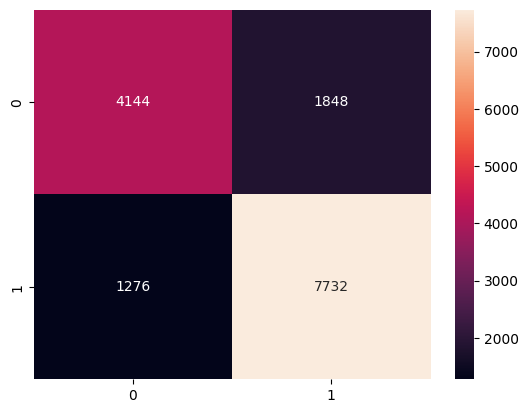

In [47]:
sns.heatmap(confusion_matrix(y_test,log_pred), annot= True, fmt='d')

Making Prediction using Logistic Regression

In [48]:
reviews = ['This is an amazing product,I will definetly buy it ',
         'very bad,I dont recommend it at all',
'we received this coffee yesterday, and have to say its amazing',
         'experience was terrible',
         'I will buy again from this site,everything was perfect']

prediction = logistic_pipe.predict(reviews)
sentiment =["Positive" if i == 1 else "Negative" for i in prediction]
print(sentiment)

['Positive', 'Negative', 'Negative', 'Negative', 'Positive']


2. NAIVE BAYES

              precision    recall  f1-score   support

           0     0.8350    0.3867    0.5286      5992
           1     0.6994    0.9492    0.8054      9008

    accuracy                         0.7245     15000
   macro avg     0.7672    0.6679    0.6670     15000
weighted avg     0.7535    0.7245    0.6948     15000



<Axes: >

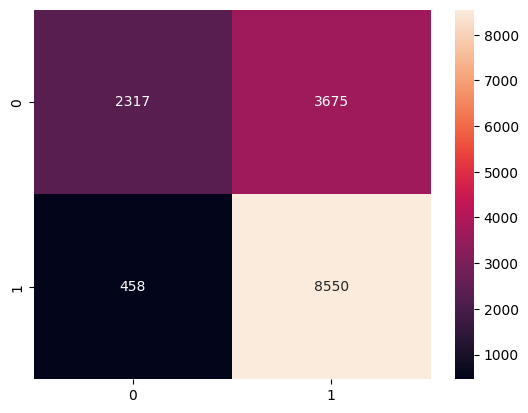

In [57]:
naive_bayes_pipeline = Pipeline([
    ('vec', CountVectorizer(stop_words='english')),
    ('tfidf', TfidfTransformer()),
    ('classifier', MultinomialNB())
])

# Train the model
nb_model = naive_bayes_pipeline.fit(x_train,y_train)
# Store the model for future use
joblib.dump(nb_model, r'.\models\naive_bayes_model.pkl')
y_pred_nb = naive_bayes_pipeline.predict(x_test)
print(classification_report(y_test, y_pred_nb,digits =4))
sns.heatmap(confusion_matrix(y_test,y_pred_nb), annot= True,fmt ='d')


In [50]:
print("Training accuracy of Naive Bayes :", nb_model.score(x_train,y_train))
print("Test accuracy of Naive Bayes:", nb_model.score(x_test,y_test))

Training accuracy of Naive Bayes : 0.761
Test accuracy of Naive Bayes: 0.7244666666666667


3. SVC

In [51]:
svm_pipeline = Pipeline([
    ('vec', CountVectorizer(stop_words='english')),
    ('tfidf', TfidfTransformer()),
    ('classifier', SVC())
])

# Train the model
svc = svm_pipeline.fit(x_train,y_train)
y_pred_svc = svm_pipeline.predict(x_test)
print(classification_report(y_test,y_pred_svc,digits=4))



              precision    recall  f1-score   support

           0     0.7644    0.6963    0.7287      5992
           1     0.8093    0.8572    0.8326      9008

    accuracy                         0.7929     15000
   macro avg     0.7868    0.7767    0.7806     15000
weighted avg     0.7913    0.7929    0.7911     15000



In [58]:
# Store the model for future use
joblib.dump(svc, r'.\models\support_vector_classifier.pkl')

['.\\models\\support_vector_classifier.pkl']

<Axes: >

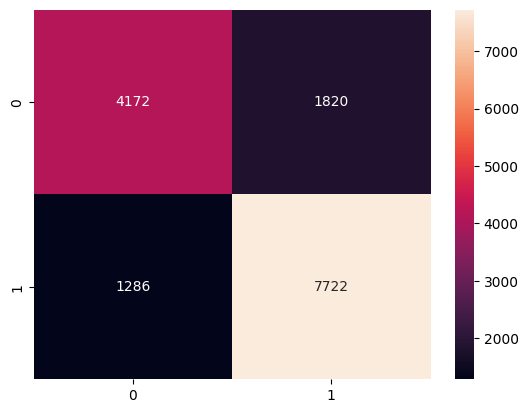

In [52]:
sns.heatmap(confusion_matrix(y_test,y_pred_svc), annot = True, fmt = 'd')

In [53]:
print('Training accuracy of SVC : ', svc.score(x_train,y_train,y_train))
print('Test accuracy of SVC : ', svc.score(x_test,y_test))

Training accuracy of SVC :  0.9678261835963547
Test accuracy of SVC :  0.7929333333333334


Making Prediction using SVC

In [54]:
reviews=['This is an amazing product,I will definetly buy it ',
         'very bad,I dont recommend it at all',
'we received this coffee yesterday, and have to say its amazing',
         'experience was terrible',
         'I will buy again from this site,everything was perfect']
prediction=svm_pipeline.predict(reviews)
sentiment=["Positive" if i == 1 else "Negative" for i in prediction]
  
print(sentiment)

['Positive', 'Negative', 'Negative', 'Negative', 'Positive']
